In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [5]:
"""
Description:
    This function plots the average scores of bounding boxes, grouped into size bins. 
    The bins are created based on the areas of bounding boxes, and the average score 
    for each bin is calculated and displayed in a bar plot. The x-axis represents 
    the size ranges of bounding boxes, and the y-axis shows the average scores.

Inputs:
    areas (numpy.ndarray or list): 
        Array of bounding box areas.
    scores (numpy.ndarray or list): 
        Array of scores corresponding to each bounding box.
    numbins (int): 
        The number of bins to divide the bounding box areas into.

Return:
    None
    (Displays a bar plot of the average scores for each size bin.)
"""
def plot_average_score_bins(areas, scores, numbins):
  bins = np.linspace(0, np.max(areas), numbins)
  bin_indices = np.digitize(areas, bins)
  mean_scores = []
  bar_titles = []

  for i in range(0, len(bins)-1):
    binned_scores = scores[bin_indices == i+1]
    mean_scores.append(binned_scores.mean())
    score_range = f'{bins[i]:.2f}-{bins[i+1]:.2f}'
    bar_titles.append(score_range)
  plt.figure(figsize=(20,10))
  plt.bar(bar_titles, mean_scores)
  for i, value in enumerate(mean_scores):
      plt.text(i, value+0.001, f"{value:.4f}", ha='center', fontsize=10)

  plt.xticks(rotation=90)
  plt.xlabel("Bin for Bounding Box Size")
  plt.ylabel("Average Score")
  plt.show()


"""
Description:
    This function reads prediction results from a JSON file and plots the average prediction scores 
    grouped by bounding box size. It extracts bounding box areas and scores from the predictions, 
    divides the areas into size bins, and uses `plot_average_score_bins` to generate a bar plot 
    showing the average scores for each bin.

Inputs:
    pred_path (str): 
        Path to the JSON file containing prediction results. Each entry in the JSON should 
        include a 'bbox' (list of [x, y, height, width]) and a 'score'.
    numbins (int): 
        The number of bins to divide the bounding box areas into.

Return:
    None
    (Displays a bar plot of the average prediction scores for each size bin.)
"""
def plot_prediction_results_by_size(pred_path, numbins):
    with open(pred_path) as f:
        data = json.load(f)
        
    areas = []
    scores = []

    for item in data:
        bbox = item['bbox']
        x,y,ht,wd = bbox
        areas.append(ht*wd)
        score = item['score']
        scores.append(score)

    areas = np.array(areas)
    scores = np.array(scores)

    plot_average_score_bins(areas, scores, numbins)

In [6]:
"""
Description:
    This function generates a side-by-side grouped bar plot comparing the average scores 
    for bounding box size bins across multiple datasets. Each dataset has its bounding 
    box areas and scores, which are divided into bins. The average score for each bin 
    is calculated and plotted for comparison.

Inputs:
    areas_list (list of numpy.ndarray): 
        A list of arrays where each array contains bounding box areas for a dataset.
    scores_list (list of numpy.ndarray): 
        A list of arrays where each array contains scores corresponding to the bounding 
        box areas in `areas_list`.
    numbins (int): 
        The number of bins to divide the bounding box areas into.
    labels (list of str): 
        A list of labels for each dataset, used in the legend of the plot.

Return:
    None
    (Displays a side-by-side grouped bar plot comparing average scores by size bin for each dataset.)
"""

def plot_average_score_bins_side_by_side(areas_list, scores_list, numbins, labels):
    bins = np.linspace(0, max(max(areas) for areas in areas_list), numbins)
    bin_width = 0.2 # Width of each bar in the grouped bar chart
    bin_centers = range(len(bins) - 1)
    
    # Prepare the data
    mean_scores_list = []
    for areas, scores in zip(areas_list, scores_list):
        bin_indices = np.digitize(areas, bins)
        mean_scores = []
        for i in range(0, len(bins) - 1):
            binned_scores = scores[bin_indices == i + 1]
            mean_scores.append(binned_scores.mean() if len(binned_scores) > 0 else 0)
        mean_scores_list.append(mean_scores)
    
    # Plot the data
    plt.figure(figsize=(20, 10))
    for i, (mean_scores, label) in enumerate(zip(mean_scores_list, labels)):
        offsets = np.array(bin_centers) + (i - len(labels) / 2) * bin_width
        plt.bar(offsets, mean_scores, width=bin_width, label=label, alpha=0.7)
    
    # Set up the x-axis
    bar_titles = [f'{bins[i]:.2f}-{bins[i + 1]:.2f}' for i in range(len(bins) - 1)]
    plt.xticks(bin_centers, bar_titles, rotation=45)
    plt.xlabel("Bin for Bounding Box Size")
    plt.ylabel("Average Score")
    plt.title("Average Scores by Size Bin (Side-by-Side Comparison)")
    plt.legend(title="Dataset")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

"""
Description:
    This function reads prediction results from multiple JSON files and generates a side-by-side 
    grouped bar plot comparing the average prediction scores across datasets. It extracts bounding 
    box areas and scores from each file, divides the areas into size bins, and visualizes the average 
    scores for each bin using `plot_average_score_bins_side_by_side`.

Inputs:
    pred_paths (list of str): 
        A list of file paths to JSON files containing prediction results. Each file should include 
        entries with a 'bbox' (list of [x, y, height, width]) and a 'score'.
    numbins (int): 
        The number of bins to divide the bounding box areas into.
    labels (list of str): 
        A list of labels corresponding to each dataset, used in the legend of the plot.

Return:
    None
    (Displays a side-by-side grouped bar plot comparing average prediction scores by size bin for 
    each dataset.)
"""
def plot_prediction_results_side_by_side(pred_paths, numbins, labels):
    areas_list = []
    scores_list = []

    for pred_path in pred_paths:
        with open(pred_path) as f:
            data = json.load(f)

        areas = []
        scores = []

        for item in data:
            bbox = item['bbox']
            x, y, ht, wd = bbox
            areas.append(ht * wd)
            score = item['score']
            scores.append(score)

        areas_list.append(np.array(areas))
        scores_list.append(np.array(scores))

    plot_average_score_bins_side_by_side(areas_list, scores_list, numbins, labels)

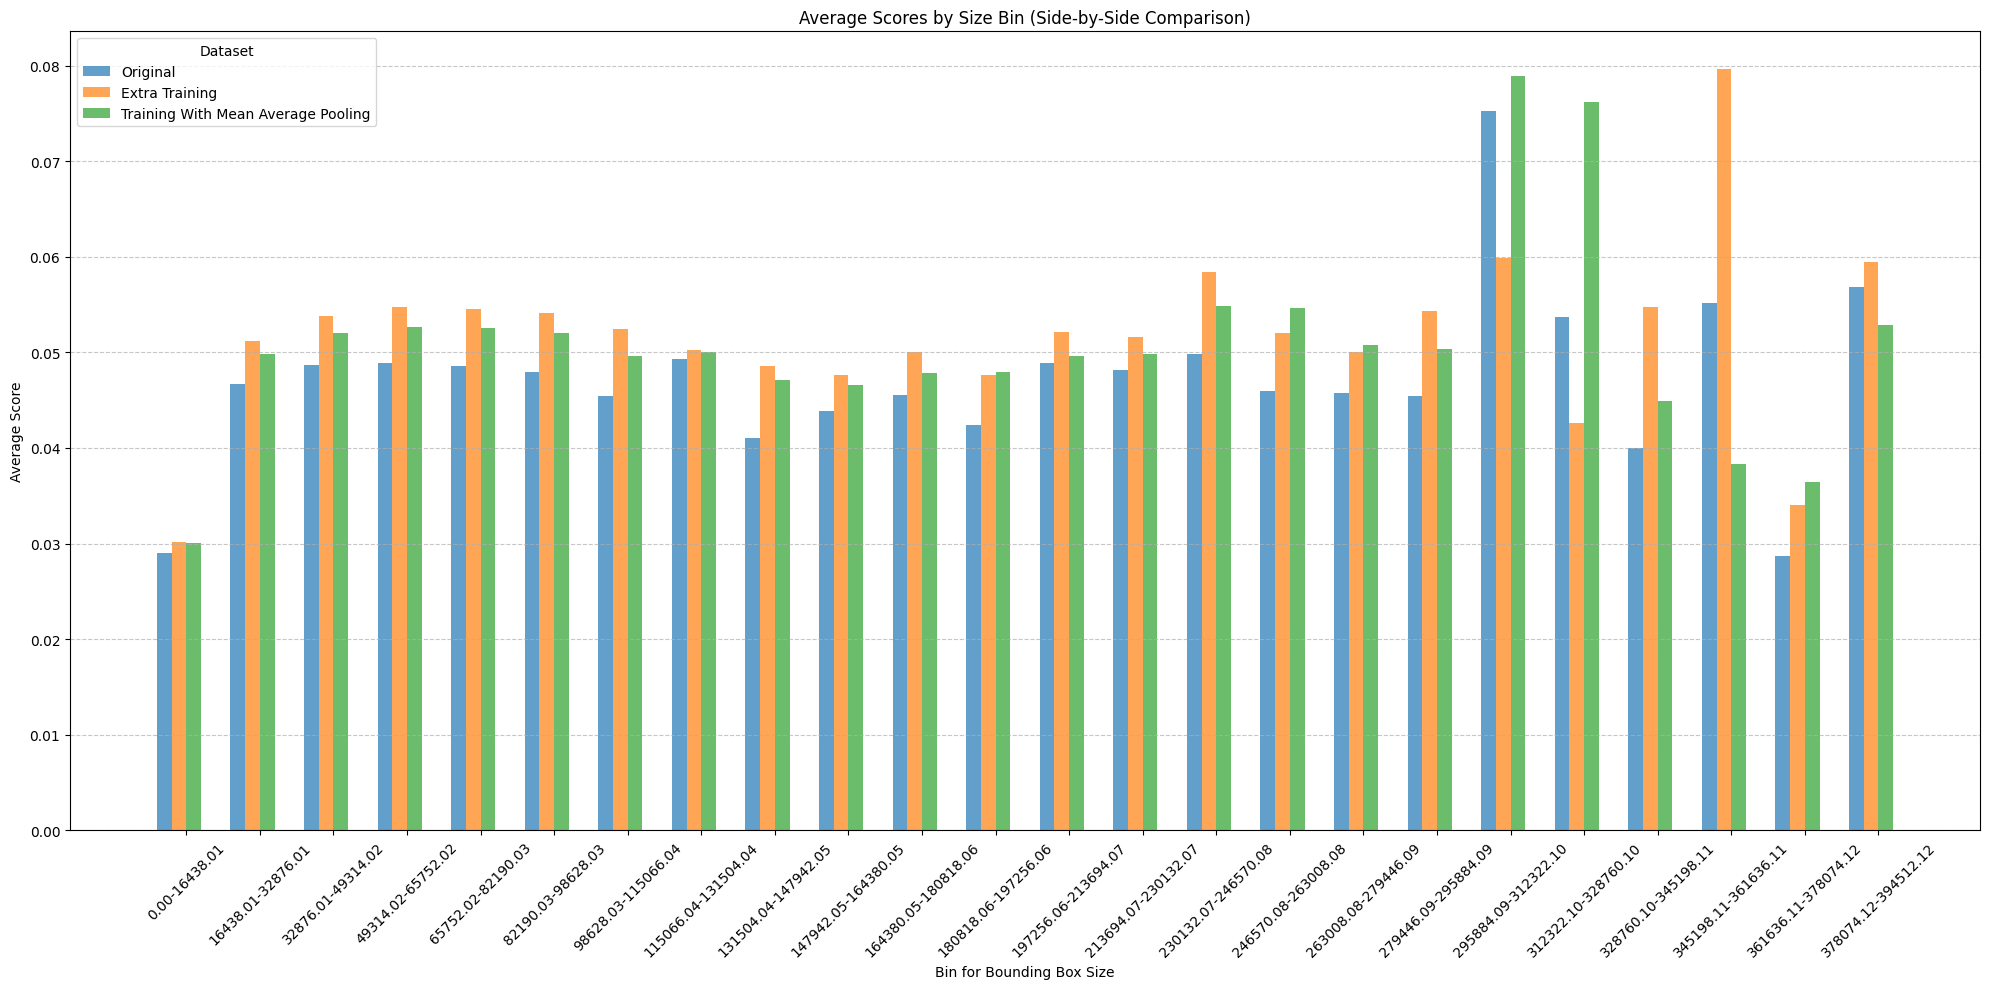

In [7]:
plot_prediction_results_side_by_side(
    ['../experiment_predictions/original_predictions.json',
    '../experiment_predictions/extra_training_predictions.json', 
    '../experiment_predictions/average_pooling_predictions.json'],
    numbins=25,
    labels=["Original", "Extra Training", "Training With Mean Average Pooling"]
)